# Compute Transition Matrix Between Directed Pairs of Labels

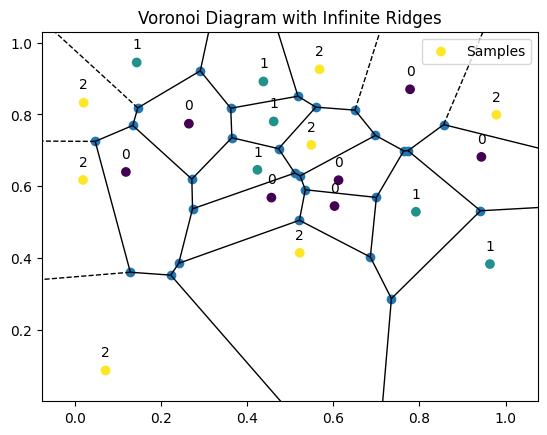

In [1]:
# Import necessary libraries
import sys
sys.path.extend(["../../"])
from src.para_voro import *
from src.para_voro_plots import *

n_points = 20
n_labels = 3

# Create a sample dataset with 10 samples
np.random.seed(0)
samples = np.random.rand(n_points, 2)
labels = np.random.randint(0, n_labels, size=(n_points, ))

# Build the Voronoi diagram
vor = Voronoi(samples)

# Plot the Voronoi diagram including infinite ridges
plt.close()
fig = voronoi_plot_2d(vor, show_points=False)
plt.scatter(samples[:, 0], samples[:, 1], c=labels, label='Samples')
for point, l in zip(samples, labels):
    plt.annotate(f"{l}", xy=point, textcoords='offset points', xytext=(0,10), ha='center')
plt.legend()
plt.title('Voronoi Diagram with Infinite Ridges')
plt.show()

In [2]:
from itertools import combinations

unique_labels = np.unique(labels)
comb = np.array(list(combinations(unique_labels, r=2)))

In [3]:
comb_twice = np.vstack([comb, comb[:, ::-1]])

In [4]:
aabbox = np.array([
    [0.0, 1.0],
    [0.0, 1.0]
])

vor = Voronoi(samples)

ridge_vertices, ridge_point_indices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox, vor=vor, return_original_ridge_point_indices=True, verbose=False)

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:305: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


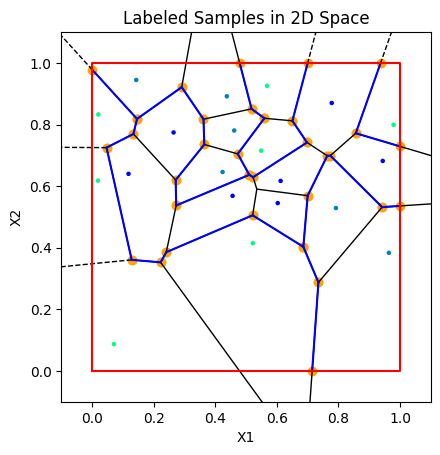

<Axes: title={'center': 'Labeled Samples in 2D Space'}, xlabel='X1', ylabel='X2'>

In [5]:
plot_ridges(ridge_vertices, samples, labels, aabbox)

Regions with infinity edges: [np.int64(6), np.int64(11), np.int64(1), np.int64(3), np.int64(9), np.int64(5), np.int64(7), np.int64(0)]
Neighboring cells for each point: {0: [np.int64(1), np.int64(3), np.int64(20)], 1: [np.int64(0), np.int64(6), np.int64(17), np.int64(20)], 3: [np.int64(0), np.int64(7), np.int64(13), np.int64(20)], 4: [np.int64(5), np.int64(6), np.int64(8), np.int64(9)], 5: [np.int64(4), np.int64(6), np.int64(9)], 6: [np.int64(1), np.int64(4), np.int64(5), np.int64(8), np.int64(17)], 7: [np.int64(3), np.int64(11), np.int64(12), np.int64(13)], 8: [np.int64(4), np.int64(6), np.int64(9), np.int64(15), np.int64(16), np.int64(17)], 9: [np.int64(4), np.int64(5), np.int64(8), np.int64(11), np.int64(15), np.int64(19)], 10: [np.int64(11), np.int64(12), np.int64(13), np.int64(18), np.int64(19)], 11: [np.int64(7), np.int64(9), np.int64(10), np.int64(12), np.int64(19)], 12: [np.int64(7), np.int64(10), np.int64(11), np.int64(13)], 13: [np.int64(3), np.int64(7), np.int64(10), np.int6

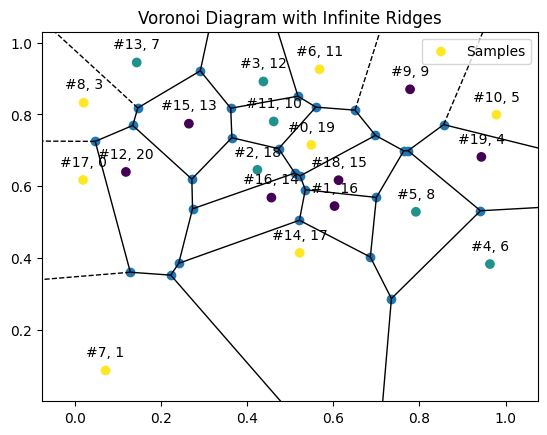

In [6]:
[point_idx_region_mapping, region_idx_point_idx_mapping, regions_with_infinity_edges, 
 region_idx_neighboring_regions_indices_mapping, 
 region_idx_ridge_indices_mapping] = identify_infinity_regions_and_neighbors(vor)

# Print or use the results as needed
print("Regions with infinity edges:", regions_with_infinity_edges)
print("Neighboring cells for each point:", region_idx_neighboring_regions_indices_mapping)


import matplotlib.patches as patches

plt.close()
fig = voronoi_plot_2d(vor, show_points=False)

ax = fig.gca()
points = samples
ax.scatter(points[:, 0], points[:, 1], c=labels, label="Samples")

#points_with_infinity_edges = points[[region_idx_point_idx_mapping[region_idx] for region_idx in regions_with_infinity_edges]]
#ax.scatter(points_with_infinity_edges[:, 0], points_with_infinity_edges[:, 1], c="red", label="Infinity Regions", s=2**7)

for point_idx, point in enumerate(points):
    region_idx = point_idx_region_mapping[point_idx]

    ax.annotate(f"#{point_idx}, {region_idx}", xy=point, textcoords='offset points', xytext=(0,10), ha='center')

# draw arrows to neighbors
for point_idx, point in enumerate(points):
    region_idx = point_idx_region_mapping[point_idx]

    for neighbor_region_idx in region_idx_neighboring_regions_indices_mapping[region_idx]:
        neighbor_point_idx = region_idx_point_idx_mapping[neighbor_region_idx]
        neighbor_point = points[neighbor_point_idx]

        midpoint = point + (neighbor_point - point) / 2.0

        # Draw arrow from current point to neighbor point
        # arrow = patches.Arrow(point[0], point[1], midpoint[0] - point[0], midpoint[1] - point[1], 
        #                       width=0.02, color="brown", linestyle="-")
        # ax.add_patch(arrow)

plt.legend()
plt.title('Voronoi Diagram with Infinite Ridges')
plt.show()

In [7]:
M_T = build_directed_ridge_vertices_selector_matrix(samples, labels, ridge_point_indices)

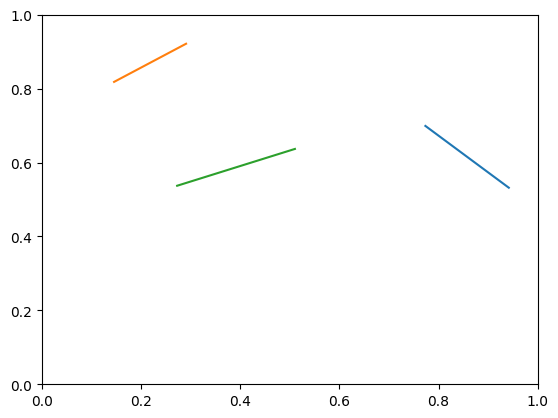

In [8]:
plt.close()
fig = plt.figure()
ax = fig.gca()

for rv in ridge_vertices[M_T[0, 1, 0]]:
    ax.plot(rv[:, 0], rv[:, 1])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()

In [9]:
#tp = ridge_based_para_sense(ridge_vertices[M_T[0, 2, 0]], np.array([0.2, 0.2]), aabbox, step_size=np.array([0.02, 0.02]))
#plot_sensitivities(tp[0], tp[1])

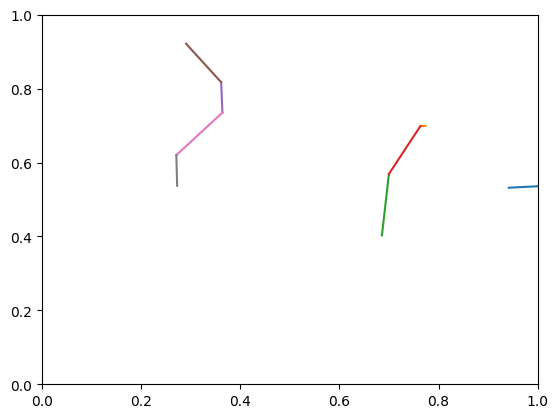

In [10]:
plt.close()
fig = plt.figure()
ax = fig.gca()

for rv in ridge_vertices[M_T[0, 0, 1]]:
    ax.plot(rv[:, 0], rv[:, 1])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()

In [11]:
bandwidths = np.array([0.05, 0.05])

In [12]:
ret = build_directed_transition_cubes(M_T, ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, step_size=bandwidths*0.1, verbose=False)

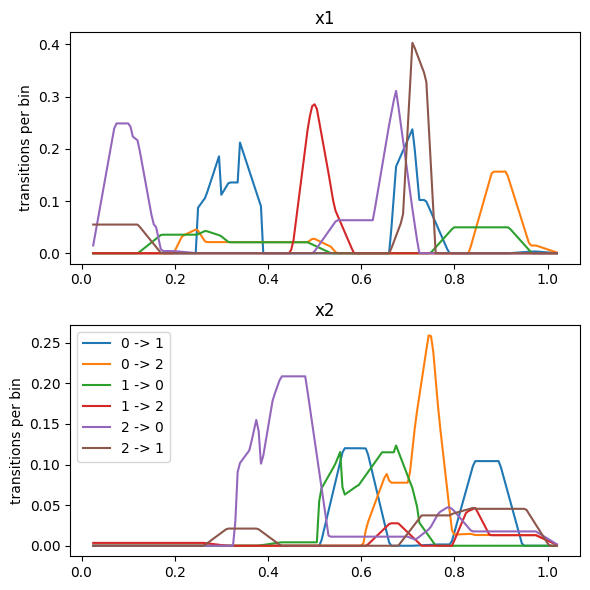

In [13]:
plot_sens_matrix_list(ret[0][0], [r[0] for r in ret[1]], stack_plot=False)